# EM-DAT data exploration
<br/> <br/>

### Reading in data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot,plot
init_notebook_mode(connected=True) 

In [2]:
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
df = pd.read_excel("emdat_public_2022_11_07_query_uid-dvxNk1.xlsx", header=6)
df.head()

/opt/homebrew/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning:

Workbook contains no default style, apply openpyxl's default



,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077091,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,781207.0,3.200175,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,3.200175,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16457 entries, 0 to 16456
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     16457 non-null  object 
 1   Year                                       16457 non-null  int64  
 2   Seq                                        16457 non-null  int64  
 3   Glide                                      1703 non-null   object 
 4   Disaster Group                             16457 non-null  object 
 5   Disaster Subgroup                          16457 non-null  object 
 6   Disaster Type                              16457 non-null  object 
 7   Disaster Subtype                           13195 non-null  object 
 8   Disaster Subsubtype                        1103 non-null   object 
 9   Event Name                                 3962 non-null   object 
 10  Country               

In [5]:
df.columns

Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'AID Contribution ('000 US$)', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damages ('000 US$)', 'Insured Damages, Adjusted ('000 US$)',
       'Total Damages ('000 US$)', 'Total Damages, Adjusted ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')

# Exploration - disaster types and counts

In [6]:
df["Country"].value_counts()

United States of America (the)    1117
China                              994
India                              758
Philippines (the)                  679
Indonesia                          598
                                  ... 
Equatorial Guinea                    1
Qatar                                1
Saint Barthélemy                     1
Saint Martin (French Part)           1
Isle of Man                          1
Name: Country, Length: 228, dtype: int64

In [7]:
df["Disaster Type"].value_counts()

Flood                    5728
Storm                    4576
Earthquake               1576
Epidemic                 1519
Drought                   792
Landslide                 788
Extreme temperature       607
Wildfire                  453
Volcanic activity         269
Insect infestation         95
Mass movement (dry)        48
Glacial lake outburst       3
Impact                      1
Fog                         1
Animal accident             1
Name: Disaster Type, dtype: int64

In [8]:
df["Disaster Type"].isna().sum()

0

In [9]:
df["Disaster Type"].describe()

count     16457
unique       15
top       Flood
freq       5728
Name: Disaster Type, dtype: object

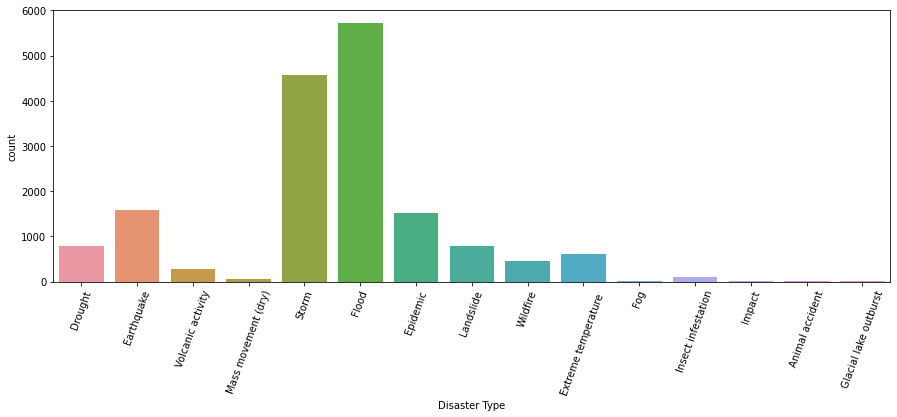

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(data=df, x=df["Disaster Type"])
plt.xticks(rotation = 70)
plt.show()

# Data Cleaning

In [11]:
df_updated = df[[
    "Dis No", "Year", "Disaster Type", "Disaster Subtype", "Country", "ISO", "Region", "Continent",
    "Start Year", "Start Month", "End Year", "End Month",
    "Total Deaths", "No Injured", "No Affected", "No Homeless", "Total Affected"
]]

df_updated.head()

,Dis No,Year,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,Start Year,Start Month,End Year,End Month,Total Deaths,No Injured,No Affected,No Homeless,Total Affected
0,1900-9002-CPV,1900,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,1900,NaN,11000.0,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,Drought,Drought,India,IND,Southern Asia,Asia,1900,NaN,1900,NaN,1250000.0,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,1902,4.0,1902,4.0,2000.0,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,4.0,1902,4.0,1000.0,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,Volcanic activity,Ash fall,Guatemala,GTM,Central America,Americas,1902,10.0,1902,10.0,6000.0,NaN,NaN,NaN,NaN


In [12]:
df_updated.isna().sum()

Dis No                  0
Year                    0
Disaster Type           0
Disaster Subtype     3262
Country                 0
ISO                     0
Region                  0
Continent               0
Start Year              0
Start Month           389
End Year                0
End Month             702
Total Deaths         4738
No Injured          12385
No Affected          6918
No Homeless         14000
Total Affected       4473
dtype: int64

# Data Processing

#### Count the number of disasters by country

In [21]:
gb = df_updated.groupby("Country", sort=False)
gb

In [45]:
country = "Australia"
country_data = gb.get_group(country)[["Disaster Type", "Year"]].value_counts()
print(country_data)

Disaster Type  Year
Flood          1998    6
Storm          1996    6
Flood          2010    5
               2022    5
Storm          2003    5
                      ..
Flood          2006    1
               2005    1
               2000    1
               1997    1
Wildfire       2021    1
Length: 124, dtype: int64


In [32]:
# quick check through distaster ocurrence counts for all countries
for country_name, country_df in gb:
    print(f"{country_name}:") 
    print(f"{country_df['Disaster Type'].value_counts()}")
    # break

Cabo Verde:
Drought               12
Storm                  3
Epidemic               2
Volcanic activity      2
Insect infestation     2
Flood                  2
Name: Disaster Type, dtype: int64


# Data Visualization

### Choropleth Map 

In [14]:
data = dict(
        type = 'choropleth',
        locations = df["ISO"],
        z = df["Disaster Type"],
        text = df["Country"],
        colorbar = {'title' : 'Flooding vs Fire'},
      ) 

layout = dict(title = 'Flooding vs Fire',
                geo = dict(showframe = False)
             )

In [15]:
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)